# Homework (9 pts) - Hidden Markov Model

The questions refer to th obsereved data sequence in the file `hmm-observation-sequence.npy` which is located in the same directory as this notebook file.

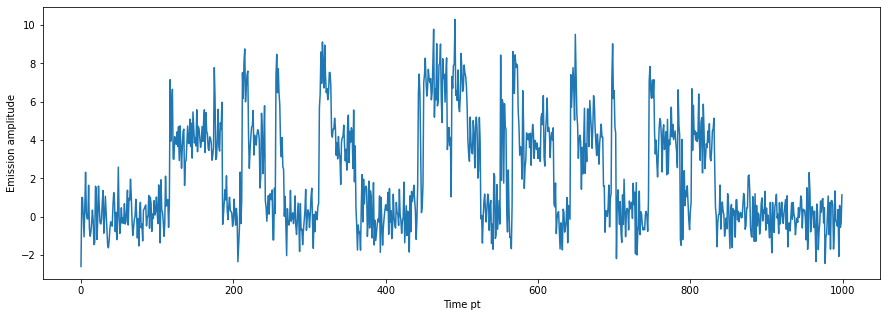

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (15, 5)

obs_seq = np.load('hmm-observation-sequence.npy')

plt.plot(obs_seq[:1000])
plt.xlabel('Time pt')
plt.ylabel('Emission amplitude');

1. (3 pts) Postulate a hidden Markov model that could plausibly explain the observation sequence shown above. Setup and bake the model using pomegranate. Hint: Keep things simple. Use the minimum number of states you think you might need to explain the data and assume that each state emits random observed values following a normal distribution. Also, take a look at the data above (and maybe look at other time periods too as the image above only shows the first 1000 data points) to get an idea of what is going on. Postulate what transitions between the states should be allowed in your model and only set those specific transitions to have non-zero probability. I recommend not worrying too much about the specific values for your non-zero transition probabilites: maybe just set each state as having 90% chance to stay in the state (this means events will last 9 frames on average) and 10% chance to go to other states (split the 10% up amongs all other states that can be reached), then let the optimizer figure out the best values for these parameters (this will be done in the next question).

In [2]:
import pomegranate as pom

hmm = pom.HiddenMarkovModel()

bot = pom.State(pom.NormalDistribution(0, 1), 'bot')
mid = pom.State(pom.NormalDistribution(4, 1), 'mid')
top = pom.State(pom.NormalDistribution(8, 1), 'top')
hmm.add_states([bot, mid, top])

hmm.add_transition(hmm.start, bot, 1)

hmm.add_transition(bot, bot, 0.9)
hmm.add_transition(bot, top, 0.1)

hmm.add_transition(top, top, 0.9)
hmm.add_transition(top, mid, 0.1)

hmm.add_transition(mid, mid, 0.9)
hmm.add_transition(mid, bot, 0.1)

hmm.bake()

2. (3 pts) Optimize your model parameters based on the observation sequence. Use the Baum-Welch algorithm (if your computer cannot handle this you can use the Viterbi algorithm).

In [3]:
hmm.fit([obs_seq], algorithm='baum-welch');

3. (3 pts) Predict the most likely sequence of hidden states that would explain the observation sequence. Plot the first 1000 data points of the observation sequence and color each data point according to it's predicted most likely hidden state (e.g., see the lecture).

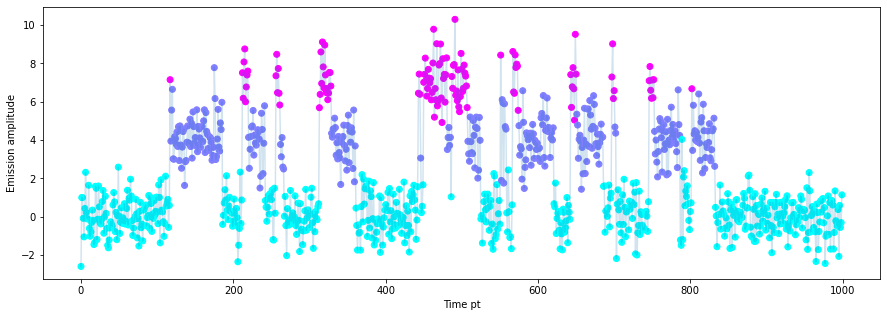

In [4]:
state_seq = hmm.predict(obs_seq)

plt.plot(obs_seq[:1000], alpha=0.2)
plt.scatter(range(1000), obs_seq[:1000], c=state_seq[:1000], cmap='cool')
plt.xlabel('Time pt')
plt.ylabel('Emission amplitude');